In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/utils')
from metacells_derivation import preprocess, assign_metacells, create_mc_matrix, preprocess_mc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [51]:
# Some plotting aesthetics 
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['savefig.directory'] = '/group/testa/Project/OvarianAtlas/atlas_project/plots_def/metacells/'

In [50]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/cancer/'
genes = '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/4_hdg/Tables/atlas_hdg_dispersion_patients_cancer.csv'
figDir = '/group/testa/Project/OvarianAtlas/atlas_project/plots_def/metacells/'

In [4]:
adata = sc.read(initDir + 'seacells_assignment_hdg_patients.h5ad')

In [28]:
adata.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8,SEACell,SEACell_patient_tissue
AAACCTGAGACTTGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.573949,0.271034,0.150646,-0.859225,1.361101,CancerMSK,CancerMSK,39,SEACell-2,SEACell-2_Geistlinger_59_Metastasis
AAACCTGCACACCGCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,1.167978,-0.047284,0.487113,-1.470363,2.397757,CancerMSK,CancerMSK,24,SEACell-8,SEACell-8_Geistlinger_59_Metastasis
AAACCTGTCCGGCACA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.124351,0.049115,0.099754,-0.826442,0.835305,CancerMSK,CancerMSK,3,SEACell-5,SEACell-5_Geistlinger_59_Metastasis
AAACCTGTCGGCGGTT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,1.557208,-0.085818,0.785574,-1.310645,1.982256,CancerMSK,CancerMSK,24,SEACell-4,SEACell-4_Geistlinger_59_Metastasis
AAACGGGAGGCACATG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.991994,0.092564,0.751106,-1.311807,1.175807,CancerMSK,CancerMSK,1,SEACell-1,SEACell-1_Geistlinger_59_Metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGGTTTCTGGGCCA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.170240,-0.223300,-0.089026,-1.284106,1.170240,CancerMSK,HematopoieticMSK,48,SEACell-26,SEACell-26_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGAGGTCTGGA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.300668,-0.187025,-0.140951,-1.446519,1.300668,CancerMSK,HematopoieticMSK,48,SEACell-111,SEACell-111_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACGTCTCT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.131369,0.055238,-0.153193,-1.350754,20.481843,CancerMSK,HematopoieticMSK,51,SEACell-90,SEACell-90_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACTTGAAC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.097371,-0.007790,-0.188808,-1.295135,1.097371,CancerMSK,HematopoieticMSK,48,SEACell-64,SEACell-64_Vasquez_118_Metastasis


In [29]:
adata.obs['SEACell'] = adata.obs['SEACell_patient_tissue']

In [30]:
adata.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8,SEACell,SEACell_patient_tissue
AAACCTGAGACTTGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.573949,0.271034,0.150646,-0.859225,1.361101,CancerMSK,CancerMSK,39,SEACell-2_Geistlinger_59_Metastasis,SEACell-2_Geistlinger_59_Metastasis
AAACCTGCACACCGCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,1.167978,-0.047284,0.487113,-1.470363,2.397757,CancerMSK,CancerMSK,24,SEACell-8_Geistlinger_59_Metastasis,SEACell-8_Geistlinger_59_Metastasis
AAACCTGTCCGGCACA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.124351,0.049115,0.099754,-0.826442,0.835305,CancerMSK,CancerMSK,3,SEACell-5_Geistlinger_59_Metastasis,SEACell-5_Geistlinger_59_Metastasis
AAACCTGTCGGCGGTT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,1.557208,-0.085818,0.785574,-1.310645,1.982256,CancerMSK,CancerMSK,24,SEACell-4_Geistlinger_59_Metastasis,SEACell-4_Geistlinger_59_Metastasis
AAACGGGAGGCACATG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.991994,0.092564,0.751106,-1.311807,1.175807,CancerMSK,CancerMSK,1,SEACell-1_Geistlinger_59_Metastasis,SEACell-1_Geistlinger_59_Metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGGTTTCTGGGCCA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.170240,-0.223300,-0.089026,-1.284106,1.170240,CancerMSK,HematopoieticMSK,48,SEACell-26_Vasquez_118_Metastasis,SEACell-26_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGAGGTCTGGA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.300668,-0.187025,-0.140951,-1.446519,1.300668,CancerMSK,HematopoieticMSK,48,SEACell-111_Vasquez_118_Metastasis,SEACell-111_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACGTCTCT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.131369,0.055238,-0.153193,-1.350754,20.481843,CancerMSK,HematopoieticMSK,51,SEACell-90_Vasquez_118_Metastasis,SEACell-90_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACTTGAAC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1.097371,-0.007790,-0.188808,-1.295135,1.097371,CancerMSK,HematopoieticMSK,48,SEACell-64_Vasquez_118_Metastasis,SEACell-64_Vasquez_118_Metastasis


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


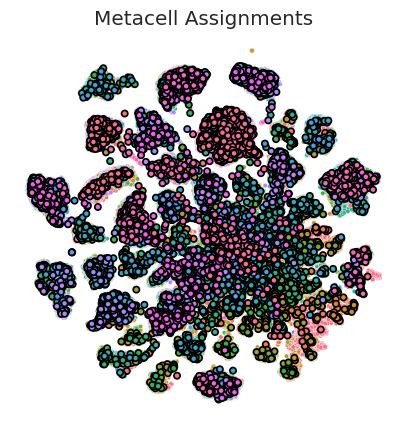

In [32]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


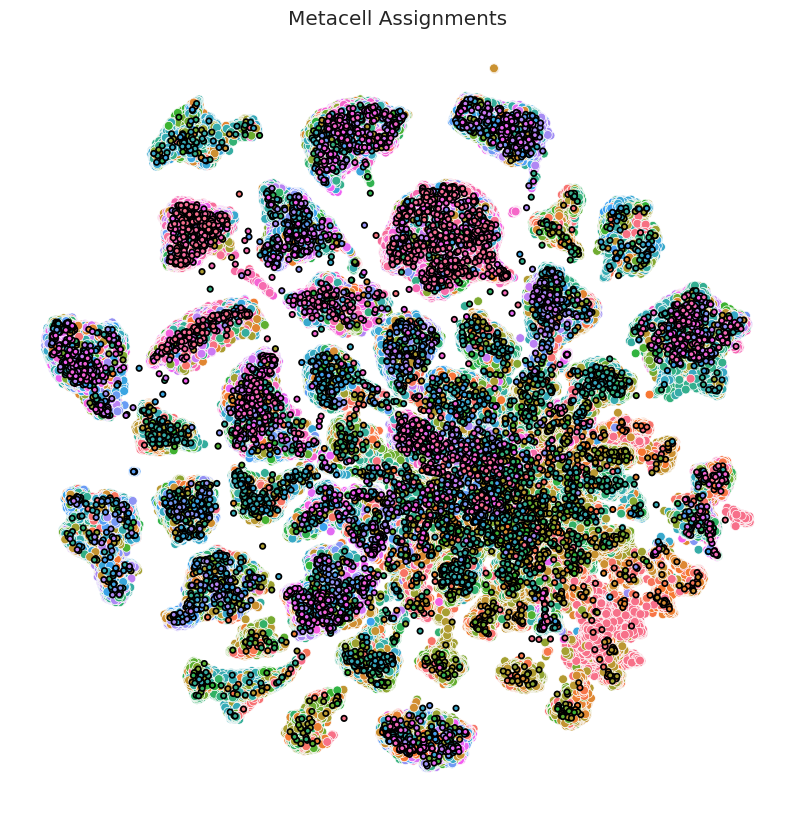

In [54]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True, SEACell_size=15, cell_size=40, figsize=(10, 10))

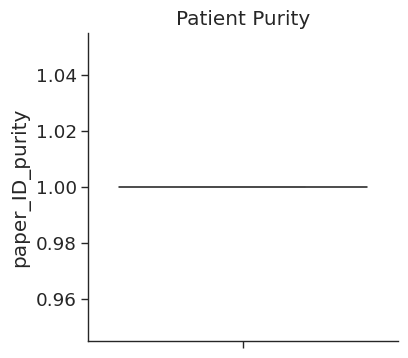

,paper_ID,paper_ID_purity
SEACell,,
SEACell-0_Geistlinger_59_Metastasis,Geistlinger_59,1.0
SEACell-0_Geistlinger_76_Metastasis,Geistlinger_76,1.0
SEACell-0_Geistlinger_77_Metastasis,Geistlinger_77,1.0
SEACell-0_Geistlinger_89_Metastasis,Geistlinger_89,1.0
SEACell-0_Loret_1_Ascites,Loret_1,1.0


In [35]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'paper_ID')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='paper_ID_purity')
plt.title('Patient Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

Determing nearest neighbor graph...


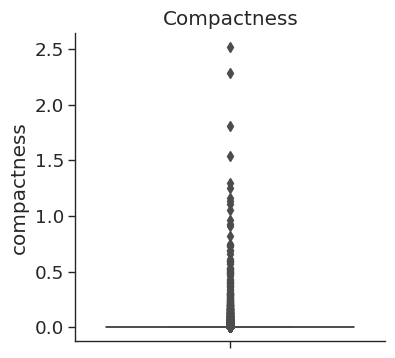

,compactness
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.000047
SEACell-0_Geistlinger_76_Metastasis,0.000010
SEACell-0_Geistlinger_77_Metastasis,0.032089
SEACell-0_Geistlinger_89_Metastasis,0.000012
SEACell-0_Loret_1_Ascites,0.000004


In [37]:
compactness = SEACells.evaluate.compactness(adata, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


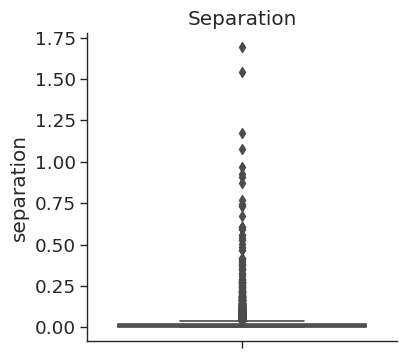

,separation
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.013859
SEACell-0_Geistlinger_76_Metastasis,0.005052
SEACell-0_Geistlinger_77_Metastasis,0.030525
SEACell-0_Geistlinger_89_Metastasis,0.001555
SEACell-0_Loret_1_Ascites,0.002566


In [38]:
separation = SEACells.evaluate.separation(adata, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()